Aggregating data to the level of individuals

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib import pyplot as plt
import pandas as pd
from bsmcalls import individuals
from bsmcalls import readVCF
from bsmcalls import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import fwsel
import re

Import calls and clinical data and filter for NeuN+ samples

In [2]:
calls, clin = individuals.get_data(merge=False)
calls = calls.loc(axis=0)[:, 'NeuN_pl']

In [3]:
aggcalls = individuals.agg_calls(calls)
data = pd.concat([aggcalls, clin], axis=1)

In [4]:
aggcalls

Variable      nCalls        AF           BaseQRankSum                    DP  \
Transform      count      mean       std         mean       std        mean   
Individual ID                                                                 
CMC_MSSM_027      56  0.094286  0.110055     1.394286  2.469961  202.892857   
CMC_MSSM_055      49  0.046939  0.068380     2.242102  2.001271  255.020408   
CMC_MSSM_056       9  0.082222  0.040552     1.131333  2.036603  104.222222   
CMC_MSSM_069      12  0.106667  0.032287    -0.287417  2.675964   58.916667   
CMC_MSSM_097      96  0.078125  0.131135     1.063500  2.669541  372.781250   
...              ...       ...       ...          ...       ...         ...   
CMC_PITT_098      26  0.102308  0.059686     0.961385  1.958133  161.230769   
CMC_PITT_101      13  0.123077  0.092681     1.000154  1.917042  130.769231   
CMC_PITT_113      33  0.103030  0.159462     0.546909  3.012843  251.727273   
CMC_PITT_117      17  0.096471  0.086958     1.080529  1.835480  182.411765   
CMC_PITT_118      42  0.066190  0.054188     0.841714  2.103925  221.452381   

Variable                         FS                  SOR  ... FILTER/PASS  \
Transform            std       mean        std      mean  ...     entropy   
Individual ID                                             ...               
CMC_MSSM_027   27.324766   2.737946   3.867827  0.981536  ...    0.872250   
CMC_MSSM_055   25.005408   2.351408   2.822638  1.120061  ...    0.902886   
CMC_MSSM_056   10.802520   1.398000   1.819863  0.813111  ...    0.848686   
CMC_MSSM_069    6.141636  12.272083  11.296428  2.714083  ...    1.314374   
CMC_MSSM_097   58.511034   1.965771   2.715713  0.887000  ...    1.254138   
...                  ...        ...        ...       ...  ...         ...   
CMC_PITT_098   14.475656   2.299462   2.279725  0.935885  ...    0.271189   
CMC_PITT_101   12.410707   1.480077   1.671059  0.823077  ...    0.687092   
CMC_PITT_113   22.765479   1.648909   1.838384  0.977273  ...    1.047320   
CMC_PITT_117   19.419896   3.010176   2.533470  1.063294  ...    0.362211   
CMC_PITT_118   16.920477   2.593690   2.894319  1.057952  ...    0.474482   

Variable        culprit                     ChromatinState_DLPFC            \
Transform     marg_mode frequency   entropy            marg_mode frequency   
Individual ID                                                                
CMC_MSSM_027         QD  0.946429  0.242999                Quies  0.732143   
CMC_MSSM_055         QD  0.979592  0.099623                Quies  0.632653   
CMC_MSSM_056         QD  0.888889  0.348832                Quies  0.666667   
CMC_MSSM_069         QD  1.000000  0.000000                Quies  0.750000   
CMC_MSSM_097         QD  0.875000  0.487732                Quies  0.687500   
...                 ...       ...       ...                  ...       ...   
CMC_PITT_098         QD  1.000000  0.000000                Quies  0.615385   
CMC_PITT_101         QD  0.769231  0.687092                Quies  0.769231   
CMC_PITT_113         QD  0.969697  0.135794                Quies  0.666667   
CMC_PITT_117         QD  0.941176  0.223718                Quies  0.823529   
CMC_PITT_118         QD  0.976190  0.112516                Quies  0.761905   

Variable                evolConstrain                      
Transform       entropy     marg_mode frequency   entropy  
Individual ID                                              
CMC_MSSM_027   0.965981             0  0.910714  0.300882  
CMC_MSSM_055   1.152910             0  0.979592  0.099623  
CMC_MSSM_056   0.848686             0  1.000000  0.000000  
CMC_MSSM_069   0.836988             0  0.916667  0.286836  
CMC_MSSM_097   1.030783             0  0.937500  0.233792  
...                 ...           ...       ...       ...  
CMC_PITT_098   1.318487             0  0.923077  0.271189  
CMC_PITT_101   0.540204             0  1.000000  0.000000  
CMC_PITT_113   1.110038             0  1.000000  0.000000  
C

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, CMC_MSSM_027 to CMC_PITT_118
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   (nCalls, count)                    85 non-null     int64   
 1   (AF, mean)                         85 non-null     float64 
 2   (AF, std)                          85 non-null     float64 
 3   (BaseQRankSum, mean)               85 non-null     float64 
 4   (BaseQRankSum, std)                85 non-null     float64 
 5   (DP, mean)                         85 non-null     float64 
 6   (DP, std)                          85 non-null     float64 
 7   (FS, mean)                         85 non-null     float64 
 8   (FS, std)                          85 non-null     float64 
 9   (SOR, mean)                        85 non-null     float64 
 10  (SOR, std)                         85 non-null     float64 
 11  (VQSLOD, mean)                 

### Correlations

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1e49ea3dd0>)

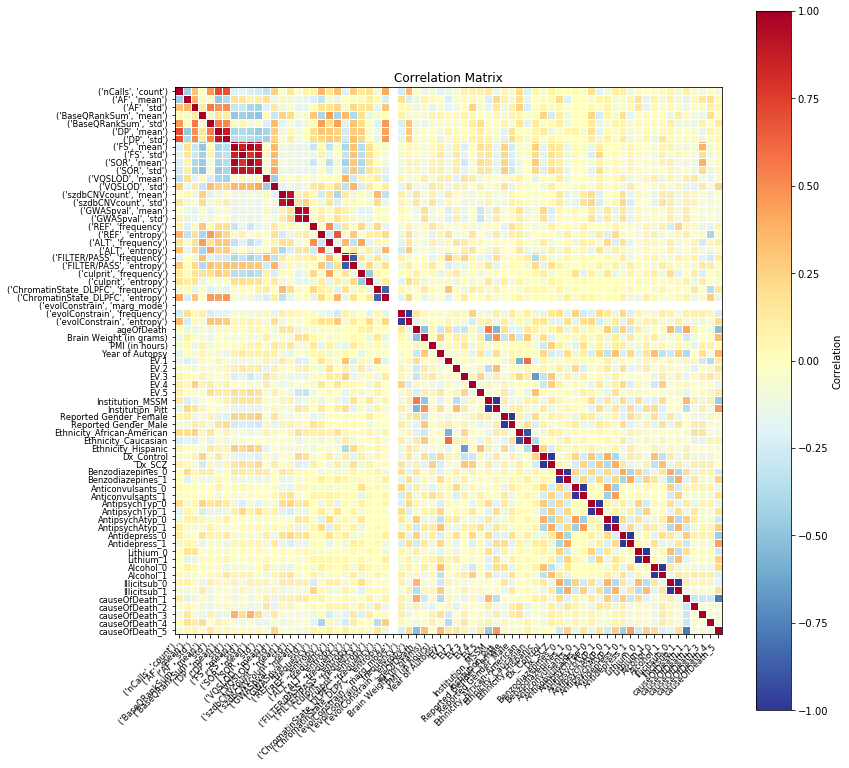

In [6]:
datanum = preprocessing.dummify_df(data)
def corrmatplot(dfnum):
    corrmat = dfnum.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    sm.graphics.plot_corr(corrmat, ax=ax, xnames=corrmat.columns, ynames=corrmat.columns)
    cb = plt.colorbar(ax.get_images()[0])
    cb.set_label('Correlation')
    return((fig, ax))
corrmatplot(datanum)

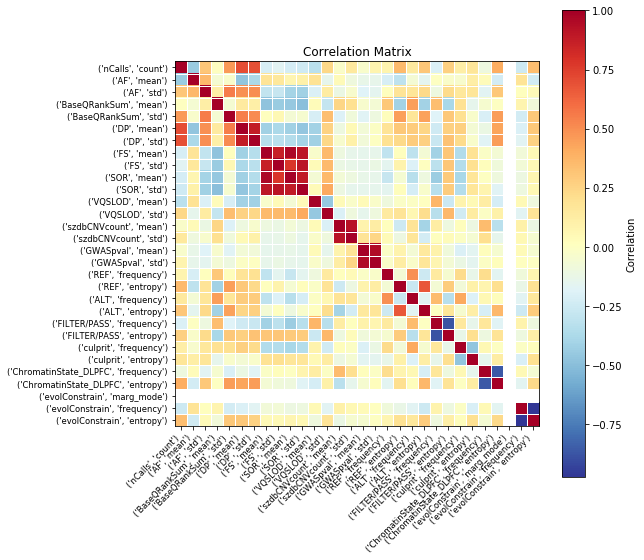

In [7]:
fig, ax = corrmatplot(datanum.loc[:, :('evolConstrain', 'entropy')])
fig.set_size_inches(8, 8)

## Modeling: Dx as response

First let's preprocess the data

In [8]:
data1 = preprocessing.preprocess(data)
# we remove the marginal modes since these are all degenerate variables
cols2drop = [y for y in data1.columns if re.match('.*_marg_mode', y)]
data1 = data1.drop(columns=cols2drop)

### Forward variable selection

In [9]:
best1 = fwsel.forward_selected(data1, 'Dx')

In [10]:
best1.model.formula

'Dx ~ AntipsychAtyp + YearofAutopsy + AntipsychTyp + EV3 + Institution + Benzodiazepines + causeOfDeath + Ethnicity + SOR_std + DP_std + DP_mean + ageOfDeath + evolConstrain_entropy + Alcohol + ReportedGender + REF_frequency + VQSLOD_std + BrainWeightingrams + BaseQRankSum_mean + REF_entropy + FILTERPASS_entropy + Antidepress + szdbCNVcount_mean + EV1 + 1'

In [11]:
best1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Dx   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     8.903
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           3.35e-12
Time:                        14:00:25   Log-Likelihood:                 18.279
No. Observations:                  85   AIC:                             21.44
Df Residuals:                      56   BIC:                             92.28
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.6140      0.131      4.695      0.000       0.352       0.876
AntipsychAtyp[T.1]         0.6069      0.068      8.875      0.000       0.470       0.744
AntipsychTyp[T.1]          0.2547      0.095      2.686      0.010       0.065       0.445
Institution[T.Pitt]        0.0460      0.099      0.464      0.645      -0.153       0.245
Benzodiazepines[T.1]      -0.0692      0.095     -0.728      0.470      -0.260       0.121
causeOfDeath[T.2]          0.1150      0.203      0.566      0.573      -0.292       0.522
causeOfDeath[T.3]          0.2080      0.217      0.960      0.341      -0.226       0.642
causeOfDeath[T.4]         -0.0052      0.276     -0.019      0.985      -0.559       0.548
causeOfDeath[T.5]          0.1703      0.117      1.450      0.153      -0.065       0.406
Ethnicity[T.Caucasian]    -0.0954      0.136     -0.704      0.485      -0.367       0.176
Ethnicity[T.Hispanic]     -0.8030      0.292     -2.754      0.008      -1.387      -0.219
Alcohol[T.1]               0.1530      0.081      1.884      0.065      -0.010       0.316
ReportedGender[T.Male]    -0.1151      0.072     -1.606      0.114      -0.259       0.028
Antidepress[T.1]          -0.1902      0.096     -1.982      0.052      -0.382       0.002
YearofAutopsy             -0.1415      0.036     -3.957      0.000      -0.213      -0.070
EV3                        0.0635      0.041      1.544      0.128      -0.019       0.146
SOR_std                    0.0876      0.054      1.628      0.109      -0.020       0.195
DP_std                     0.2200      0.071      3.106      0.003       0.078       0.362
DP_mean                   -0.1341      0.076     -1.770      0.082      -0.286       0.018
ageOfDeath                 0.0518      0.046      1.125      0.265      -0.040       0.144
evolConstrain_entropy     -0.0666      0.033     -2.007      0.050      -0.133      -0.000
REF_frequency              0.0633      0.033      1.941      0.057      -0.002       0.129
VQSLOD_std                -0.0763      0.043     -1.762      0.084      -0.163       0.010
BrainWeightingrams        -0.0880      0.042     -2.112      0.039      -0.171      -0.005
BaseQRankSum_mean         -0.0963      0.045     -2.160      0.035      -0.186      -0.007
REF_entropy               -0.1215      0.045     -2.679      0.010      -0.212      -0.031
FILTERPASS_entropy         0.0806      0.040      2.015      0.049       0.000       0.161
szdbCNVcount_mean         -0.0538      0.033     -1.647      0.105      -0.119       0.012
EV1                        0.0474      0.046      1.020      0.312      -0.046       0.140
==============================================================================
Omnibus:                        2.634   Durbin-Watson:                   1.888
Prob(Omnibus)

## Simple univariate regression

Fitting logit
Optimization terminated successfully.
         Current function value: 0.562707
         Iterations 6
Fitting probit
Optimization terminated successfully.
         Current function value: 0.561771
         Iterations 6


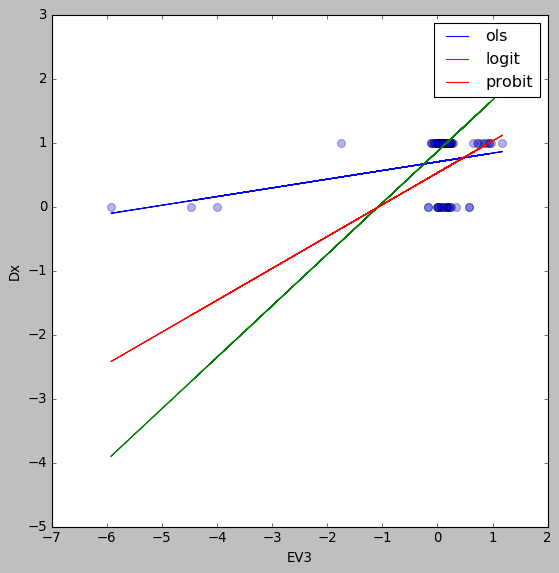

In [12]:
%matplotlib inline
plt.style.use('classic')

def simple_reg(sel_col='EV3', data=data1):
    f = 'Dx ~ ' + sel_col
    lin = smf.ols(formula=f, data=data1).fit()
    print('Fitting logit')
    logi = smf.logit(formula=f, data=data1).fit()
    print('Fitting probit')
    probi = smf.probit(formula=f, data=data1).fit()
    #p = sm.graphics.plot_regress_exog(lin, sel_col)
    fig, ax = plt.subplots(figsize=(8, 8))
    data.plot(x=sel_col, y='Dx', kind='scatter', alpha=0.3, s=50, marker='o', ax=ax)
    ax.plot(data[sel_col].values, lin.fittedvalues.values, label='ols')
    ax.plot(data[sel_col].values, logi.fittedvalues.values, label='logit')
    ax.plot(data[sel_col].values, probi.fittedvalues.values, label='probit')
    ax.legend()
    return((lin, logi, probi))

mm = simple_reg('EV3')

Fitting logit
Optimization terminated successfully.
         Current function value: 0.603272
         Iterations 5
Fitting probit
Optimization terminated successfully.
         Current function value: 0.603172
         Iterations 5


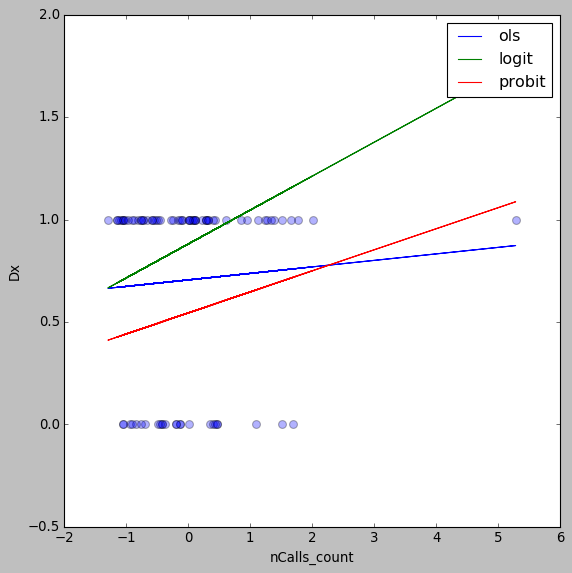

In [13]:
mm = simple_reg('nCalls_count', data=data1)

## Modeling: nCalls as response

The idea is to use the nCalls variable as response.  Benefits include:
* nCalls is better suited for linear modeling since it can be considered as a continuous response variable
* technical variables that affect nCalls such as read depth (see below) can be incorporated into the model

### Visual exploration

Text(0.5, 0.98, 'no. calls and read depth')

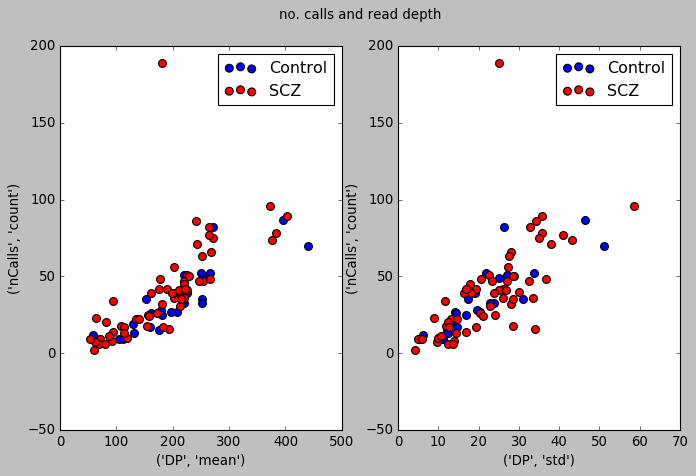

In [14]:
def myscatter(ax, x=('DP', 'mean'), y=('nCalls', 'count')):
    df = data.loc[data['Dx'] == 'Control', [x, y]]
    ax.scatter(x=df[x], y=df[y], label='Control', c='b', s=50)
    df = data.loc[data['Dx'] == 'SCZ', [x, y]]
    ax.scatter(x=df[x], y=df[y], label='SCZ', c='r', s=50)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.legend()
    return(None)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
myscatter(ax=ax[0], x=('DP', 'mean'), y=('nCalls', 'count'))
myscatter(ax=ax[1], x=('DP', 'std'), y=('nCalls', 'count'))
fig.suptitle('no. calls and read depth')

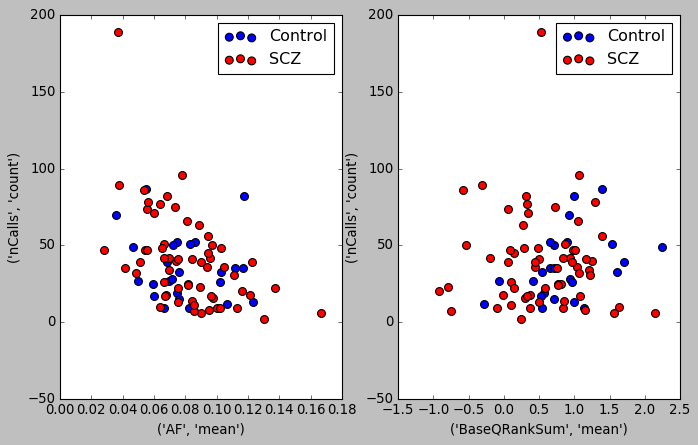

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
myscatter(ax=ax[0], x=('AF', 'mean'), y=('nCalls', 'count'))
myscatter(ax=ax[1], x=('BaseQRankSum', 'mean'), y=('nCalls', 'count'))

### Finding the outlier

In [16]:
data[('nCalls', 'count')].sort_values()

CMC_MSSM_201      2
CMC_MSSM_266      6
CMC_MSSM_331      6
CMC_MSSM_293      7
CMC_MSSM_308      8
               ... 
CMC_MSSM_343     86
CMC_MSSM_406     87
CMC_MSSM_213     89
CMC_MSSM_097     96
CMC_MSSM_224    189
Name: (nCalls, count), Length: 85, dtype: int64

In [17]:
clin.loc['CMC_MSSM_224']

Institution                            MSSM
Reported Gender                      Female
Ethnicity                  African-American
ageOfDeath                               53
Brain Weight (in grams)                1130
PMI (in hours)                          6.3
Dx                                      SCZ
Year of Autopsy                        2001
Benzodiazepines                           0
Anticonvulsants                           0
AntipsychTyp                              0
AntipsychAtyp                             1
Antidepress                               0
Lithium                                   0
Alcohol                                   0
Illicitsub                                0
causeOfDeath                              1
EV.1                              -0.080551
EV.2                               0.000982
EV.3                               0.035962
EV.4                               0.000456
EV.5                               0.006669
Name: CMC_MSSM_224, dtype: objec

### Forward variables selection

In [18]:
best2 = fwsel.forward_selected(data1, 'nCalls_count')

In [22]:
best2.model.formula

'nCalls_count ~ DP_mean + culprit_entropy + Ethnicity + AF_mean + ReportedGender + DP_std + AntipsychAtyp + YearofAutopsy + Anticonvulsants + szdbCNVcount_std + REF_entropy + EV1 + EV3 + evolConstrain_frequency + Lithium + Antidepress + 1'

In [20]:
best2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           nCalls_count   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     10.85
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           2.86e-13
Time:                        14:00:45   Log-Likelihood:                -63.892
No. Observations:                  85   AIC:                             163.8
Df Residuals:                      67   BIC:                             207.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.4164      0.244      1.708      0.092      -0.070       0.903
Ethnicity[T.Caucasian]     -0.2000      0.254     -0.787      0.434      -0.707       0.307
Ethnicity[T.Hispanic]      -0.1616      0.656     -0.246      0.806      -1.471       1.147
ReportedGender[T.Male]     -0.3920      0.148     -2.657      0.010      -0.686      -0.098
AntipsychAtyp[T.1]          0.3951      0.175      2.257      0.027       0.046       0.744
Anticonvulsants[T.1]       -0.5697      0.247     -2.305      0.024      -1.063      -0.076
Lithium[T.1]               -0.7159      0.623     -1.149      0.255      -1.960       0.528
Antidepress[T.1]           -0.1979      0.178     -1.110      0.271      -0.554       0.158
DP_mean                     0.2717      0.156      1.742      0.086      -0.040       0.583
culprit_entropy             0.1548      0.067      2.303      0.024       0.021       0.289
AF_mean                    -0.1770      0.078     -2.258      0.027      -0.334      -0.021
DP_std                      0.3482      0.153      2.277      0.026       0.043       0.653
YearofAutopsy              -0.1079      0.071     -1.513      0.135      -0.250       0.034
szdbCNVcount_std            0.1270      0.072      1.752      0.084      -0.018       0.272
REF_entropy                 0.1453      0.078      1.855      0.068      -0.011       0.302
EV1                        -0.1356      0.084     -1.606      0.113      -0.304       0.033
EV3                         0.0963      0.093      1.035      0.304      -0.089       0.282
evolConstrain_frequency    -0.0977      0.074     -1.326      0.189      -0.245       0.049
==============================================================================
Omnibus:                       63.590   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.371
Skew:                           2.119   Prob(JB):                    2.02e-112
Kurtosis:                      14.281   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
%connect_info

{
  "shell_port": 33001,
  "iopub_port": 55297,
  "stdin_port": 33661,
  "control_port": 48993,
  "hb_port": 60273,
  "ip": "127.0.0.1",
  "key": "4c1fbe1c-a47a07fe55db2a37517e0f9e",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-c8d247fa-02b7-489b-9574-6631d8b21a3c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
